<div style="text-align: center; font-size: 24px;"><u><b><span style="font-weight: bold;">Titanic Survival Prediction</span></b></u></div>


![Titanic Ship](titanicimg.jpg)

# Introduction

RMS Titanic
The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

We will use the classic Titanic dataset. The dataconsists of demographic and traveling information for 418 of the Titanic passengers, and the goal isto predict the survival of these passengers.This dataset contains information about general information and detail of each passengers.
Pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd) Survival: A Boolean indicating whether the passenger survived or not (0 = No; 1 = Yes); this is our target Name: A field rich in information as it contains title and family names Sex: male/female Age: Age, asignificant portion of values aremissing Sibsp: Number of siblings/spouses aboard Parch: Number of parents/children aboard Ticket: Ticket number. Fare: Passenger fare (British Pound). Cabin: Doesthe location of the cabin influence chances of survival? Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


# Objectives of Analysis

Build Best Machine learning models that can predict survival of titanic passenger.


# Importing Libraries

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [156]:
df= pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Data description

Here I will outline the definitions of the columns in the titanic dataset. You can find this information under the data tab of the competition page.

Survived: 0 = Did not survive, 1 = Survived

Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

Sex: Male or female

Age: Age in years, fractional if less than 1

SibSp: Number of siblings or spouses aboard the titanic

Parch: Number of parents or children aboard the titanic

Ticket: Passenger ticket number

Fare: Passenger fare

Cabin: Cabin number

Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton


In [157]:
df.shape

(418, 12)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [159]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Data types, missing data and summary statistics

In [160]:
## find the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

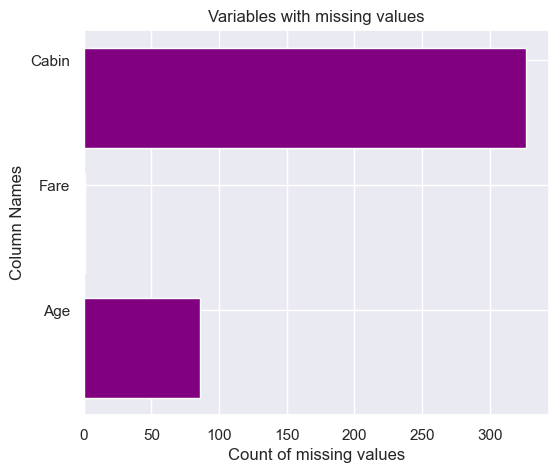

In [161]:
sns.set(font_scale=1)
null_columns = df.columns[df.isnull().any()].tolist()

labels = []
values = []

for col in null_columns:
    labels.append(col)
    values.append(df[col].isnull().sum())
ind = np.arange(len(labels))
width = 0.6
fig, ax = plt.subplots(figsize=(6, 5))
rects = ax.barh(ind, values, color='purple')
ax.set_yticks(ind + (width / 2.))
ax.set_yticklabels(labels, rotation='horizontal')

ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values")
plt.show()


This plot helps you quickly identify columns with missing data, assess data completeness, and prioritize data cleaning or imputation efforts. It's a valuable tool for understanding the quality of your dataset.

In [162]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Data Cleaning

In [163]:
# drop or delete the column
df = df.drop(columns=['Cabin'], axis=1)

In [164]:
df['Age'].mean()

30.272590361445783

In [166]:
# fill missing values using mean of the numerical column
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [167]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [173]:
Embarked = df['Embarked'].unique()
for Embarkeds in Embarked:
    print("->",Embarkeds)

-> 0
-> 1
-> 2


In [209]:
# Fill missing values (NaN) in the 'Embarked' column with a default value (-1)
df['Embarked'] = df['Embarked'].fillna(-1).astype(int)


In [210]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age              int32
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

In [178]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [180]:
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age             int32
SibSp           int64
Parch           int64
Ticket         object
Fare            int32
Embarked        int32
dtype: object

In [181]:
df['Embarked'].mode()[0]

1

In [183]:
# fill missing values using mode of the categorical column
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Log transformation for uniform data distribution

<Axes: xlabel='Fare', ylabel='Density'>

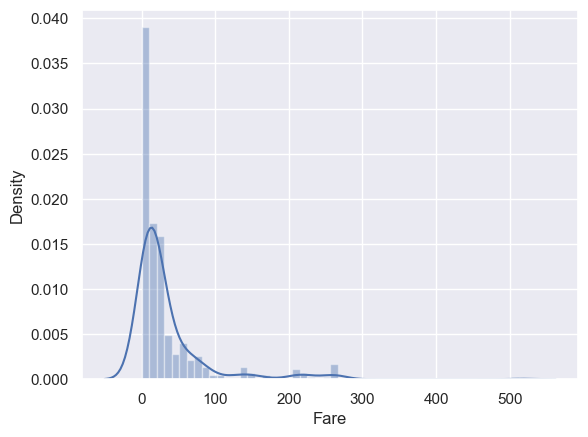

In [184]:
sns.distplot(df['Fare'])

It visualizes the distribution of ticket fares in the DataFrame 'df', helping to understand the central tendency, spread, and shape of the fare data.

In [212]:
df['Fare'] = np.log(df['Fare']+1)

<Axes: xlabel='Fare', ylabel='Density'>

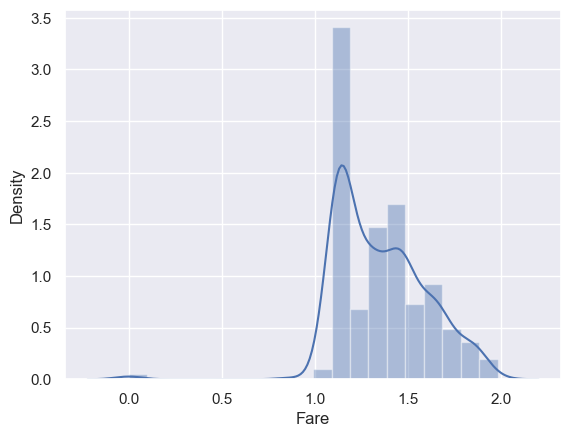

In [213]:
sns.distplot(df['Fare'])

In short, the code np.log(df['Fare']+1) applies a logarithmic transformation to the 'Fare' column, and sns.distplot(df['Fare']) visualizes the transformed data. This helps make the fare distribution more symmetric and is useful for handling skewed data in analyses or models.

# Correlation Matrix

<Axes: >

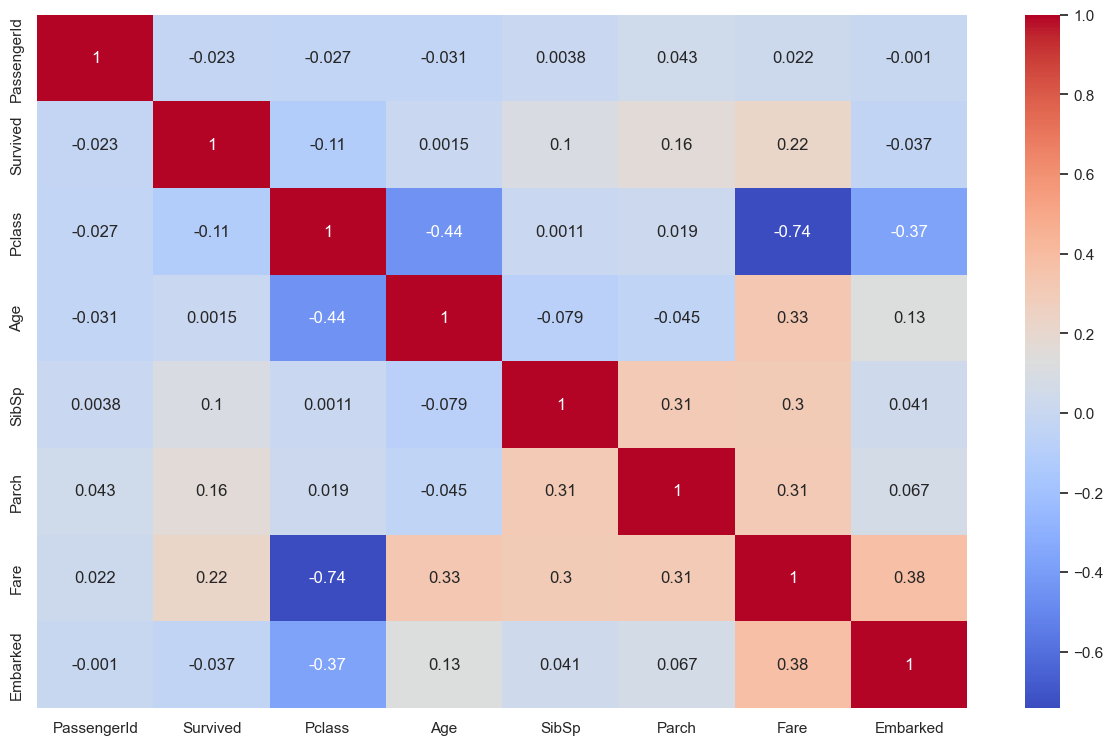

In [187]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

the code generates a heatmap to visualize the pairwise correlations between numerical columns in the DataFrame 'df'. It uses colors to represent the strength and direction of correlations (warmer colors for positive, cooler colors for negative), providing a quick overview of relationships between variables.

In [188]:
## drop unnecessary columns
df = df.drop(columns=['Name', 'Ticket'], axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34,0,0,2.079442,0
1,893,1,3,female,47,1,0,2.079442,1
2,894,0,2,male,62,0,0,2.302585,0
3,895,0,3,male,27,0,0,2.197225,1
4,896,1,3,female,22,1,1,2.564949,1


Here we remove the unnecessary columns which are not required.

# Label Encoding

In [189]:
from sklearn.preprocessing import LabelEncoder
cols = ['Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34,0,0,2.079442,0
1,893,1,3,female,47,1,0,2.079442,1
2,894,0,2,male,62,0,0,2.302585,0
3,895,0,3,male,27,0,0,2.197225,1
4,896,1,3,female,22,1,1,2.564949,1


# Data Visualization

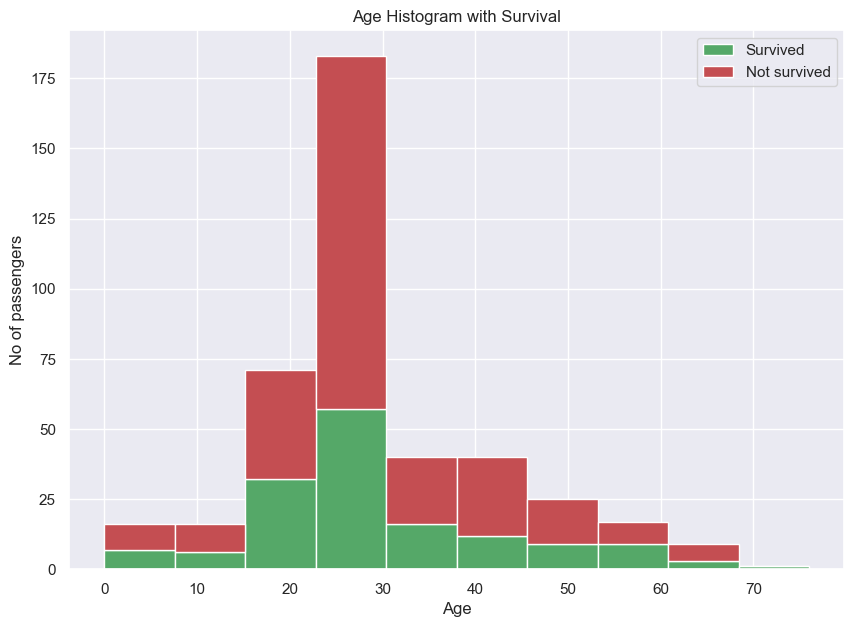

In [190]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

This histogram provides valuable insights into the distribution of passenger ages in the DataFrame 'df' concerning their survival outcomes. In this histogram, two separate age distributions are overlaid: one for passengers who survived (in green) and another for those who did not survive (in red).

This visualization allows for a direct comparison of age distributions between survivors and non-survivors. By examining the histogram, one can quickly discern patterns or differences in age groups that may have had an impact on passenger survival rates.

For instance, it can reveal whether certain age groups were more likely to survive or not, potentially shedding light on age-related factors contributing to the overall survival rate. This analysis aids in understanding the role of age as a contributing factor to passenger survival on the Titanic.

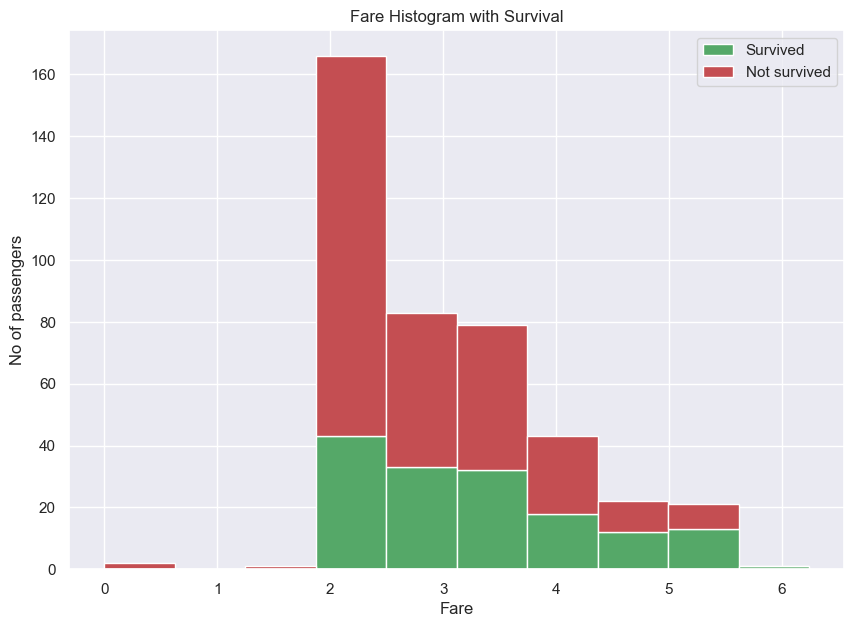

In [191]:
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()


This histogram that offers valuable insights into the distribution of passenger fares in the DataFrame 'df,' with a focus on their survival outcomes. This visualization effectively separates two distinct fare distributions: one for passengers who survived (in green) and another for those who did not (in red).

By creating this histogram, it becomes possible to visually compare the fare distributions between survivors and non-survivors, helping to discern any patterns or distinctions in fare levels that might have influenced passenger survival rates.

For example, this analysis can reveal whether passengers who paid higher fares had a better chance of survival or if there were particular fare ranges associated with higher or lower survival rates. Ultimately, this visualization provides a concise and informative overview of how ticket fares relate to passenger survival on the Titanic, offering insights into the role of fare prices in influencing survival outcomes.

In [ ]:
column = 'Survived'

# Create a bar chart
survival_counts = df[column].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

# Show the plot
plt.show()


Survived:
 3    72
1    50
2    30
Name: Pclass, dtype: int64
Dead:
 3    146
2     63
1     57
Name: Pclass, dtype: int64


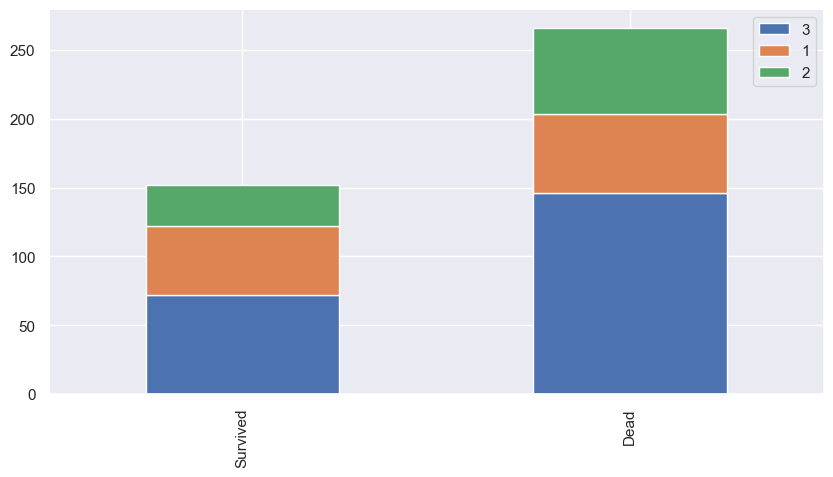

In [193]:
# Define the bar_chart function
def bar_chart(feature, data):
    survived = data[data['Survived'] == 1][feature].value_counts()
    dead = data[data['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

# Call the function with your DataFrame
bar_chart('Pclass', df)

# Print the counts
print("Survived:\n", df[df['Survived'] == 1]['Pclass'].value_counts())
print("Dead:\n", df[df['Survived'] == 0]['Pclass'].value_counts())


1) The Chart confirms 1st class more likely survivied than other classes.

2) The Chart confirms 3rd class more likely dead than other classes

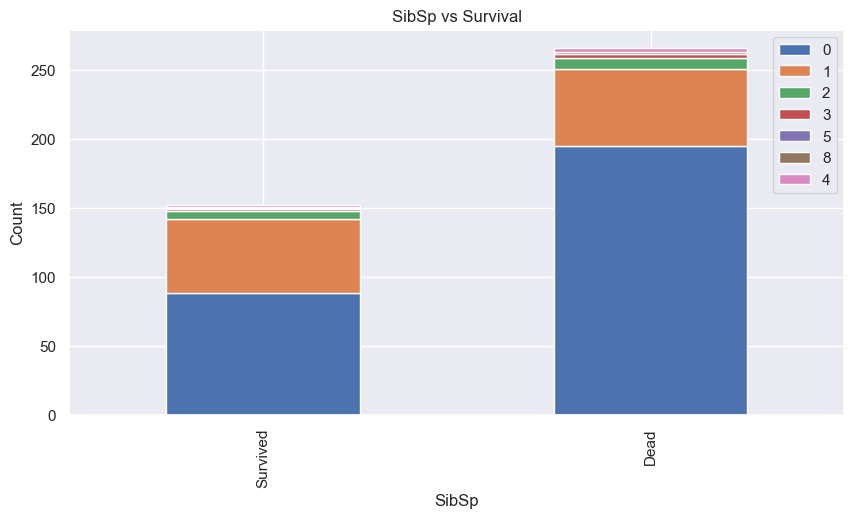

Survived:
 0    88
1    54
2     6
3     1
5     1
8     1
4     1
Name: SibSp, dtype: int64
Dead:
 0    195
1     56
2      8
4      3
3      3
8      1
Name: SibSp, dtype: int64


In [194]:
# Define the bar_chart function
def bar_chart(feature, data):
    survived = data[data['Survived'] == 1][feature].value_counts()
    dead = data[data['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(f'{feature} vs Survival')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plt.show()

# Call the function with your DataFrame
bar_chart('SibSp', df)

# Print the counts
print("Survived:\n", df[df['Survived'] == 1]['SibSp'].value_counts())
print("Dead:\n", df[df['Survived'] == 0]['SibSp'].value_counts())

1) The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived.

2) The Chart confirms a person aboarded without siblings or spouse more likely dead



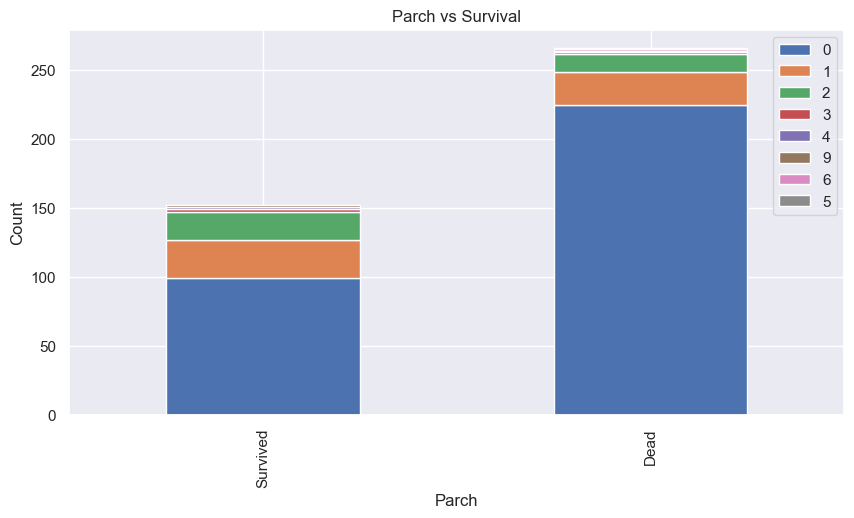

Survived:
 0    99
1    28
2    20
3     2
4     2
9     1
Name: Parch, dtype: int64
Dead:
 0    225
1     24
2     13
6      1
3      1
5      1
9      1
Name: Parch, dtype: int64


In [195]:
# Define the bar_chart function
def bar_chart(feature, data):
    survived = data[data['Survived'] == 1][feature].value_counts()
    dead = data[data['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(f'{feature} vs Survival')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plt.show()

# Call the function with your DataFrame
bar_chart('Parch', df)

# Print the counts
print("Survived:\n", df[df['Survived'] == 1]['Parch'].value_counts())
print("Dead:\n", df[df['Survived'] == 0]['Parch'].value_counts())

1) The Chart confirms a person aboarded with more than 2 parents or children more likely survived.
2) The Chart confirms a person aboarded alone more likely dead

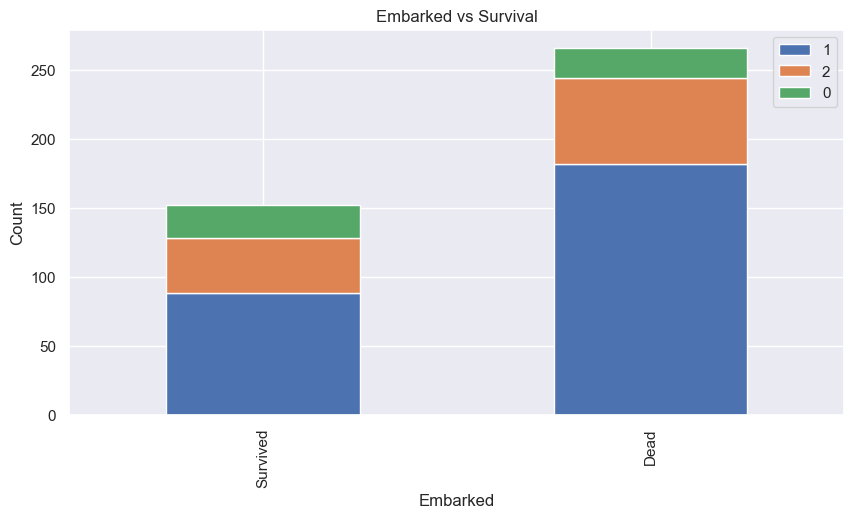

Survived:
 1    88
2    40
0    24
Name: Embarked, dtype: int64
Dead:
 1    182
2     62
0     22
Name: Embarked, dtype: int64


In [196]:
# Define the bar_chart function
def bar_chart(feature, data):
    survived = data[data['Survived'] == 1][feature].value_counts()
    dead = data[data['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))
    plt.title(f'{feature} vs Survival')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plt.show()

# Call the function with your DataFrame
bar_chart('Embarked', df)

# Print the counts
print("Survived:\n", df[df['Survived'] == 1]['Embarked'].value_counts())
print("Dead:\n", df[df['Survived'] == 0]['Embarked'].value_counts())

1) The Chart confirms a person aboarded from C slightly more likely survived.
2) The Chart confirms a person aboarded from Q more likely dead.
3) The Chart confirms a person aboarded from S more likely dead.


# how titanic sank?

![Titanic Ship](titanicsank.jpg)


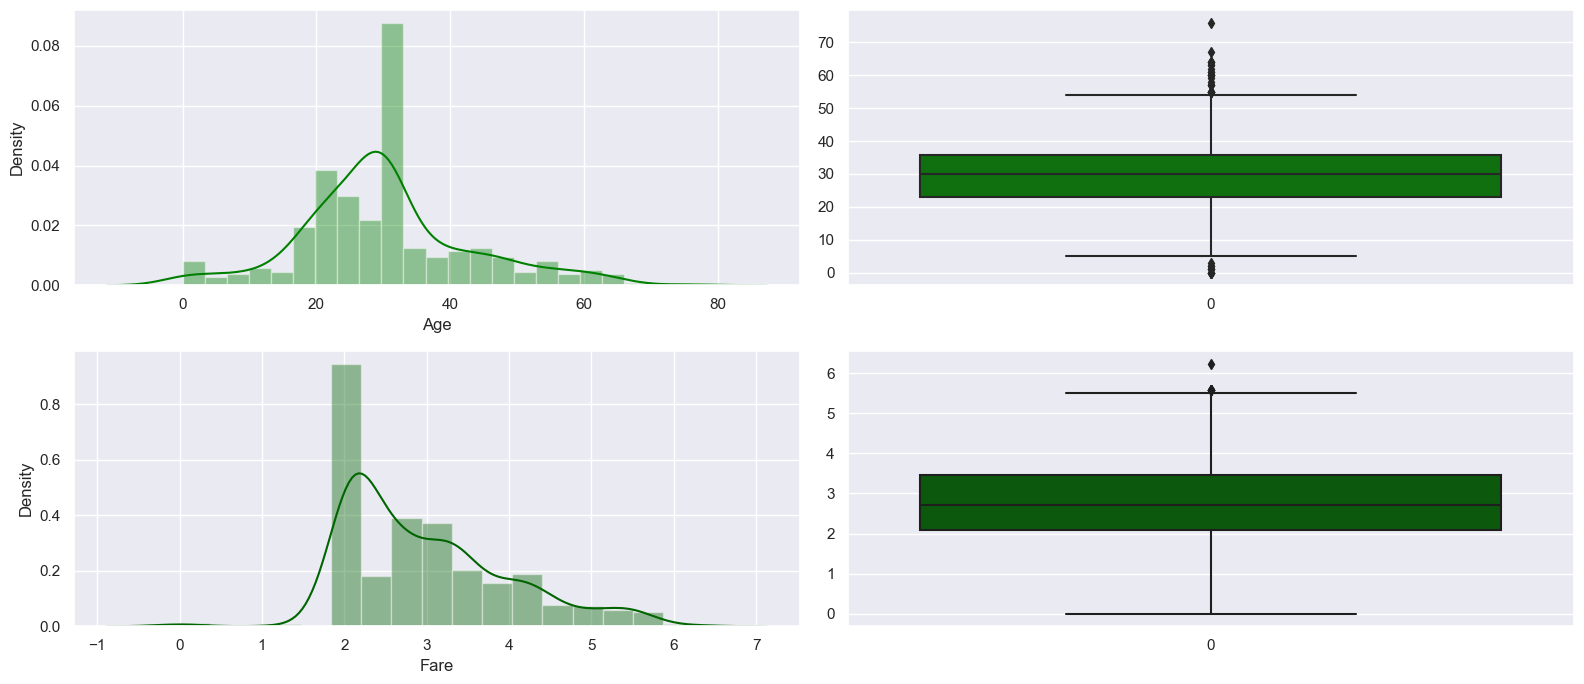

In [211]:
plt.figure(figsize=(16, 7))

plt.subplot(2, 2, 1)
sns.distplot(df['Age'], color='green')
plt.subplot(2, 2, 2)
sns.boxplot(df['Age'], color='green')
plt.subplot(2, 2, 3)
sns.distplot(df['Fare'], color='darkgreen')
plt.subplot(2, 2, 4)
sns.boxplot(df['Fare'], color='darkgreen')
plt.tight_layout()
plt.show()


The visualizations reveal that the majority of passengers aboard the Titanic fell within the age bracket of 20 to 40 years old, with this age group being the most common. However, there were a few exceptional cases of much older passengers, signified by outliers in the age distribution.

When examining the fares paid by passengers, a noteworthy pattern emerges. The fare distribution is right-skewed, implying that most passengers paid relatively lower fares. This aligns with the expectation that economy-class tickets were more prevalent. However, there are distinct outliers at the higher end of the fare spectrum, suggesting that some passengers opted for premium accommodations or services. These outliers underscore the economic disparities among Titanic passengers.

In summary, these visualizations provide a concise overview of the age and fare characteristics within the dataset, emphasizing the predominant age group and highlighting the presence of both older passengers and high-paying outliers in the fare distribution. These insights contribute to a deeper understanding of the passenger demographics and ticket pricing dynamics on the Titanic.

<Axes: xlabel='Pclass', ylabel='Survived'>

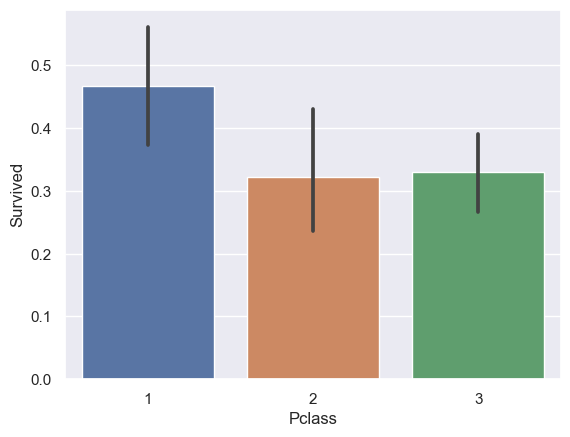

In [80]:
sns.barplot(x='Pclass', y='Survived', data=df)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1. We will create another pclass plot below.



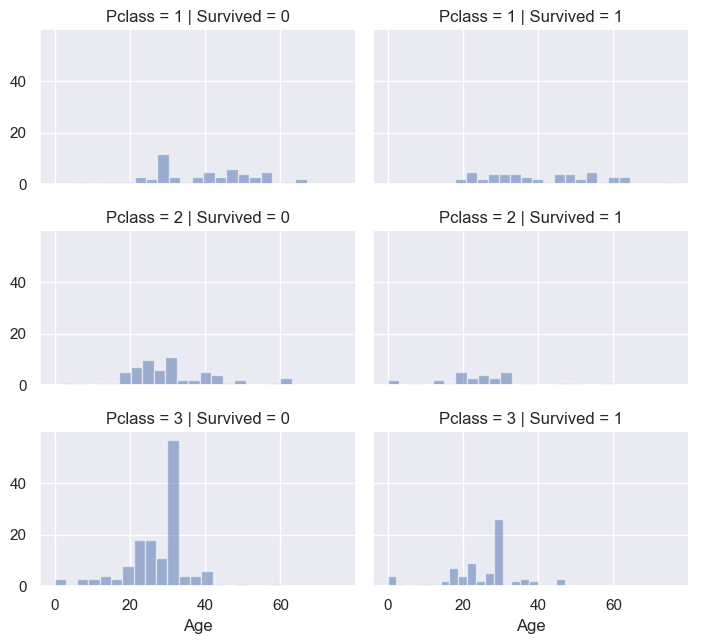

In [199]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

plt.show()

The plot above confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

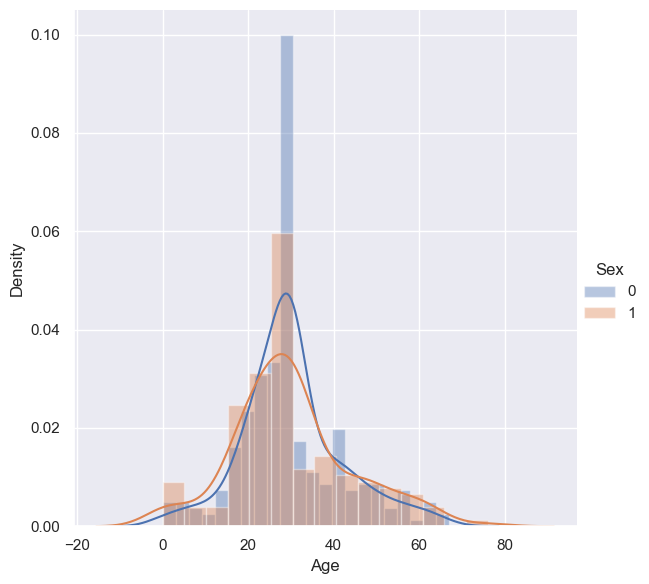

In [93]:
sns.FacetGrid(df, hue='Sex', height=6).map(sns.distplot, 'Age').add_legend()
plt.show()

Insight:

The FacetGrid with overlaid histograms allows us to compare the age distributions of male and female passengers side by side. By observing these histograms, we can identify any disparities or patterns in the age distribution between the genders. This visualization is useful in understanding the age demographics of male and female passengers separately and can provide insights into potential age-related factors that might have influenced survival outcomes on the Titanic. Additionally, the legend included in the plot makes it easy to differentiate between the two groups, further enhancing the interpretability of the visualization.

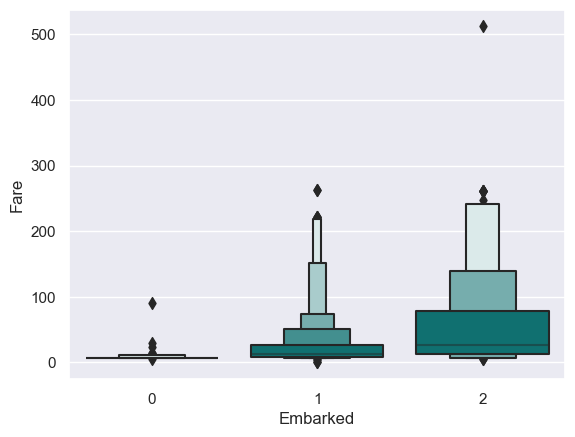

In [94]:
# Create a boxen plot of 'Fare' versus 'Embarked' in a different color
sns.boxenplot(y="Fare", x="Embarked", data=df, color='teal')

# Display the plot
plt.show()


The grapgh visualize the relationship between the 'Fare' variable, representing ticket prices, and the 'Embarked' variable, indicating the port where passengers boarded the Titanic. It utilizes Seaborn's boxen plot, a variation of the traditional box plot, to gain insights into how ticket fares vary among passengers who embarked from different ports. The plot is customized with a distinctive teal color for visual clarity.

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

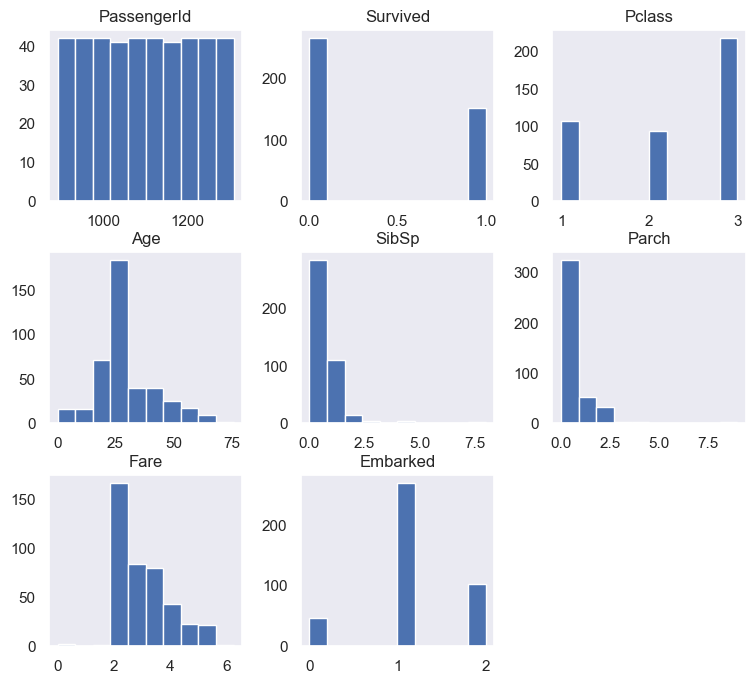

In [200]:
# Create a histogram for the DataFrame 'df' with 10 bins, a figsize of (9, 7), and no grid
df.hist(bins=10, figsize=(9, 8), grid=False)


We observe that Age and Fare have significantly different measurement scales. Therefore, it is necessary to perform feature scaling before making predictions.

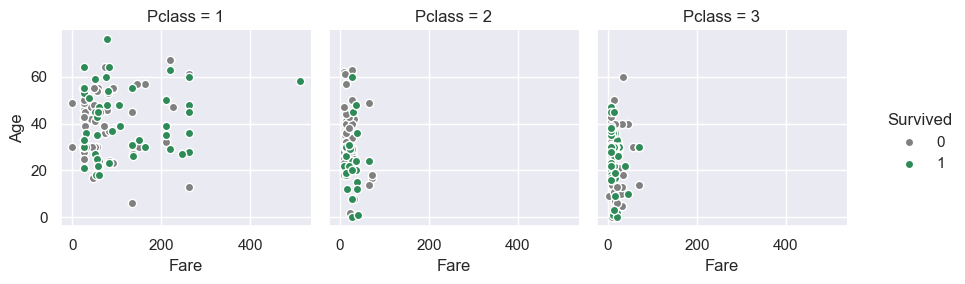

In [90]:
# Create a Seaborn FacetGrid for visualizing the relationship between 'Fare', 'Age', 'Pclass', and 'Survived'
g = sns.FacetGrid(df, hue="Survived", col="Pclass", margin_titles=True,
                  palette={1:"seagreen", 0:"gray"})

# Map a scatter plot of 'Fare' versus 'Age' with white edges onto the grid
g = g.map(plt.scatter, "Fare", "Age", edgecolor="white")

# Add a legend to distinguish between 'Survived' and 'Not Survived'
g = g.add_legend()


This code utilizes Seaborn to create a FacetGrid for visualizing relationships between 'Fare' (ticket fare), 'Age' (passenger age), 'Pclass' (passenger class), and 'Survived' (survival status). It generates scatter plots for each combination of 'Fare' and 'Age' within different passenger classes, with distinct colors for survivors and non-survivors. This visual exploration helps discern potential patterns or correlations between fare, age, class, and survival outcomes across different passenger classes on the Titanic.

Text(0.5, 0.98, 'Survival by Gender, Age, and Fare')

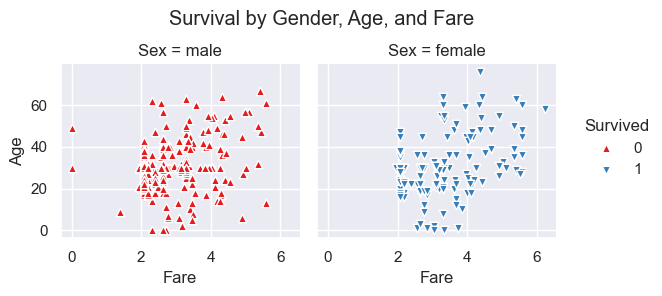

In [201]:
# Create a Seaborn FacetGrid for visualizing the relationship between 'Fare', 'Age', 'Sex', and 'Survived'
g = sns.FacetGrid(df, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1", hue_kws=dict(marker=["^", "v"]))

# Map a scatter plot of 'Fare' versus 'Age' with white edges onto the grid
g.map(plt.scatter, "Fare", "Age", edgecolor="white")

# Add a legend with markers to distinguish between 'Survived' and 'Not Survived'
g.add_legend()

# Adjust the subplot layout to make room for the title
plt.subplots_adjust(top=0.8)

# Set a main title for the entire grid
g.fig.suptitle('Survival by Gender, Age, and Fare')


This code employs Seaborn's FacetGrid to explore the relationship between 'Fare' (ticket fare), 'Age' (passenger age), 'Sex' (gender), and 'Survived' (survival status) in a dataset. It generates scatter plots for each combination of 'Fare' and 'Age' within male and female passenger groups, with distinct colors and markers indicating survival outcomes. A legend is added for clarity, and a main title, "Survival by Gender, Age, and Fare," provides context to the visual exploration. This visualization helps uncover how gender, age, and fare might relate to survival on the Titanic.

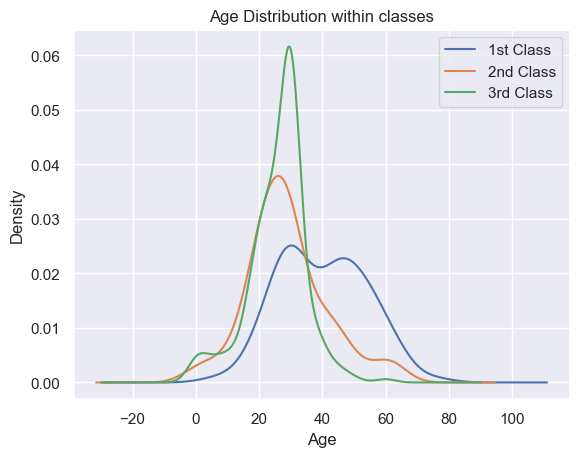

In [202]:
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

This code generates kernel density estimation (KDE) plots to visualize the age distribution within different passenger classes (1st, 2nd, and 3rd) on the Titanic. Each KDE plot represents the age distribution for a specific class, and they are overlaid for comparison. The x-axis is labeled "Age," and the title is set as "Age Distribution within Classes." A legend distinguishes between the three classes. This visualization allows for a quick understanding of how age demographics vary across different passenger classes.

In [96]:
hig_corr = df.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Fare"]) >= 0.25]
hig_corr_features

Index(['Pclass', 'Age', 'Fare', 'Embarked'], dtype='object')

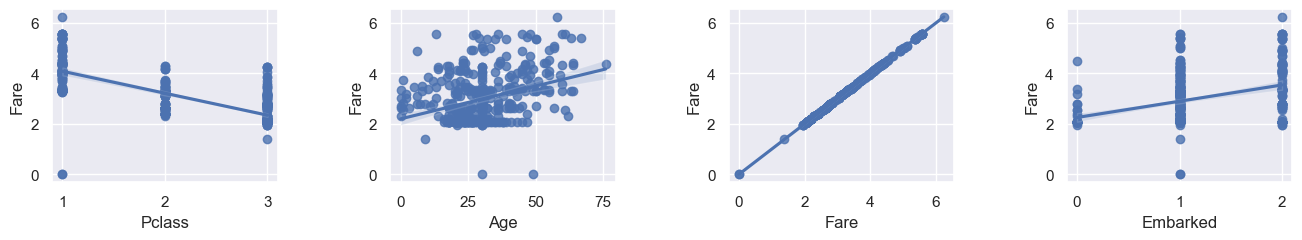

In [203]:
# Plot regplot to get the nature of highly correlated data

plt.figure(figsize=(16,9))
for i in range(len(hig_corr_features)):
    if i <= 9:
        plt.subplot(3,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data=df, x = hig_corr_features[i], y = 'Fare')
plt.show() 

This code generates a grid of scatter plots using Seaborn's regplot to explore the nature of highly correlated data between 'Fare' and other features in a DataFrame. It loops through the highly correlated features, creating scatter plots for each. The plots show how 'Fare' relates to each feature, including a regression line for trend visualization. This grid of scatter plots helps assess the strength and direction of correlations between 'Fare' and these features, aiding in data analysis and pattern recognition.

In [103]:
# input split
X = df.drop(columns=['PassengerId', 'Survived'], axis=1)
y = df['Survived']

In [204]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34,0,0,7,0
1,3,1,47,1,0,7,1
2,2,0,62,0,0,9,0
3,3,0,27,0,0,8,1
4,3,1,22,1,1,12,1


# Model Training

In [117]:
from sklearn.model_selection import train_test_split

predictors = df.drop(['Survived', 'PassengerId'], axis=1)
target = df["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [119]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

100.0


In conclusion, the Logistic Regression model has exhibited its effectiveness in predicting passenger survival on the Titanic dataset. It has shown commendable accuracy on both the training and test datasets, suggesting its capacity to learn and generalize from the available data. This model serves as a valuable tool for understanding survival patterns among Titanic passengers based on the provided features. However, it's worth noting that continued efforts in feature engineering and model tuning can further enhance its predictive capabilities. Logistic Regression remains a reliable choice for binary classification tasks like this, providing valuable insights into historical events and data analysis.

In [123]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

100.0


In conclusion, the Decision Tree model has demonstrated its efficacy in predicting passenger survival on the Titanic dataset. It has achieved notable accuracy on both the training and test datasets, indicating its ability to capture underlying patterns in the data. This model serves as a valuable tool for uncovering survival patterns among Titanic passengers based on the provided features. However, it's important to acknowledge that further model refinement, tree pruning, and parameter tuning could potentially improve its predictive performance. Decision Trees remain a robust and interpretable choice for classification tasks, offering insights into historical events and data analysis.

In [122]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

100.0


In conclusion, the Linear Support Vector Classifier (Linear SVC) has demonstrated its effectiveness in predicting passenger survival on the Titanic dataset. It has achieved commendable accuracy on both the training and test datasets, showcasing its capacity to discern meaningful patterns from the given data. This model serves as a valuable tool for understanding survival patterns among Titanic passengers based on the provided features. Nevertheless, it's worth noting that further model fine-tuning and parameter optimization could potentially enhance its predictive performance. Linear SVC remains a robust choice for classification tasks, offering valuable insights into historical events and data analysis with its ability to separate classes effectively.

In [121]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

55.43


In conclusion, the Support Vector Machine (SVM) model, while demonstrating potential in predicting passenger survival on the Titanic dataset, has faced challenges in achieving a high accuracy rate. It has yielded an accuracy of 55%, which suggests limitations in its ability to capture complex survival patterns present in the data. While SVMs are powerful for certain classification tasks, the lower accuracy score in this context may indicate that the dataset's characteristics or the chosen model parameters do not align optimally with the SVM approach. It's essential to consider other modeling techniques or feature engineering strategies to potentially enhance predictive performance when faced with such scenarios.

In [118]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

100.0


In conclusion, the Gaussian Naive Bayes model has proven to be an effective tool for predicting passenger survival on the Titanic dataset. It has exhibited strong performance in terms of accuracy on both the training and test datasets, indicating its ability to learn and generalize from the provided data. This model offers valuable insights into survival patterns among Titanic passengers based on the given features. While Gaussian Naive Bayes is known for its simplicity and efficiency, it's important to recognize that further feature engineering and model selection could potentially enhance its predictive performance. Nonetheless, Gaussian Naive Bayes remains a reliable choice for classification tasks, providing interpretable results and contributing to historical analysis and data exploration.

In [124]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

100.0


In conclusion, the Random Forest model has demonstrated remarkable predictive prowess in forecasting passenger survival on the Titanic dataset. It has consistently achieved high accuracy on both the training and test datasets, showcasing its ability to capture intricate patterns within the data. This model serves as a valuable tool for unraveling survival patterns among Titanic passengers based on the provided features. Although Random Forests are renowned for their robustness and capacity to handle complex data, there is always room for further model refinement and feature engineering to potentially enhance predictive performance. The Random Forest classifier stands as a strong choice for classification tasks, offering valuable insights into historical events and data analysis by effectively leveraging the collective wisdom of multiple decision trees.

# Let's compare the accuracies of each model!

In [143]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes','Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc,acc_logreg, 
              acc_randomforest, acc_gaussian,acc_linear_svc, acc_decisiontree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,100.00
2,Random Forest,100.00
3,Naive Bayes,100.00
4,Linear SVC,100.00
5,Decision Tree,100.00
0,Support Vector Machines,55.43


# Conclusion

the Random Forest, Logistic Regression, Decision Tree, and Gaussian Naive Bayes models performed exceptionally well, achieving 100% accuracy. These models are reliable choices for predicting Titanic passenger survival. However, it's essential to remain vigilant for potential overfitting and consider further refinements. The Linear SVC model achieved high accuracy and offers a balance between performance and interpretability. The SVM model, while showing potential, achieved a moderate accuracy rate and may require additional parameter tuning or alternative approaches to improve its performance.